# Installation de Gensim

Si vous n'avez pas encore installé Gensim, vous pouvez le faire en utilisant pip :

In [2]:
! pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Importer la bibliothèque gensim pour vérifier sa version.
import gensim

# Afficher la version de spaCy installée.
print(f"Version de gensim installée : {gensim.__version__}")

# Vérifier si la version de gensim est compatible (par exemple >= 4.0).
version_spacy = tuple(map(int, gensim.__version__.split(".")))
if version_spacy >= (4, 0, 0):
    print("Version de gensim compatible ! ✅")
else:
    print("Version de gensim trop ancienne, veuillez mettre à jour à partir de 4.0.0. ❌")

Version de gensim installée : 4.3.3
Version de gensim compatible ! ✅


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# from gensim.models import KeyedVectors
# Charger un modèle word2vec à partir d'un fichier local.
# w2v_model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/model_tp/frWiki_no_phrase_no_postag_700_cbow_cut100.bin', binary=True)

In [5]:
import gensim.downloader

w2v_model = gensim.downloader.load('word2vec-google-news-300') # 12 minutes.

In [6]:
type(w2v_model)

gensim.models.keyedvectors.KeyedVectors

Le modèle récupéré est un objet de la classe`KeyedVectors`, une classe spécialement conçue pour stocker et manipuler les vecteurs de mots obtenus à partir de modèles comme Word2Vec, FastText, etc.

Voici quelques points clés à propos des `KeyedVectors` :

1. **Stockage des vecteurs de mots** : `KeyedVectors` stocke les vecteurs de mots dans une structure qui permet un accès rapide et efficace aux vecteurs par le biais de mots-clés.

2. **Opérations sur les mots** : Avec `KeyedVectors`, vous pouvez effectuer diverses opérations linguistiques et mathématiques, telles que trouver le mot le plus similaire, calculer la similarité entre deux mots, ou effectuer des analogies de mots (comme "roi" - "homme" + "femme" = "reine").

3. **Indépendance du modèle d'entraînement** : Une fois que les vecteurs sont extraits et stockés dans `KeyedVectors`, ils sont indépendants du modèle d'entraînement. Cela signifie que vous n'avez pas besoin du modèle complet pour manipuler ces vecteurs.

4. **Efficacité en mémoire et vitesse** : Les `KeyedVectors` sont conçus pour être efficaces en termes de mémoire et rapides en termes de récupération des vecteurs, ce qui est essentiel pour les applications en temps réel.

En résumé, `KeyedVectors` est une classe pratique et puissante pour travailler avec des représentations vectorielles de mots dans des applications de traitement du langage naturel (NLP).

In [7]:
type(w2v_model)

gensim.models.keyedvectors.KeyedVectors

In [8]:
# Taille du vocabulaire.
len(w2v_model)

3000000

In [9]:
# Pour obtenir la représentation vectorielle du mot "étudiant".
w2v_model['student']

array([ 0.03686523,  0.0201416 ,  0.22167969,  0.15527344,  0.17871094,
        0.03149414,  0.31445312, -0.03369141,  0.15429688, -0.375     ,
        0.05102539, -0.13183594, -0.11962891, -0.13867188, -0.02026367,
        0.01318359, -0.06738281, -0.06591797, -0.02502441, -0.140625  ,
        0.02160645,  0.17382812, -0.00177765, -0.09179688, -0.09765625,
       -0.4921875 , -0.13671875, -0.00570679,  0.16992188,  0.10107422,
        0.09423828, -0.10986328, -0.08496094,  0.05419922, -0.06542969,
       -0.0168457 ,  0.11230469,  0.13964844, -0.08300781,  0.22265625,
       -0.23828125,  0.11767578, -0.04614258,  0.0859375 ,  0.17089844,
       -0.06884766,  0.04003906, -0.10351562,  0.15917969,  0.04956055,
       -0.10888672, -0.15039062,  0.01507568, -0.05419922,  0.25      ,
       -0.09521484, -0.11816406,  0.11132812,  0.20507812, -0.10009766,
        0.0168457 , -0.09521484, -0.00308228, -0.01348877,  0.09277344,
       -0.08447266,  0.08496094, -0.05541992,  0.15820312,  0.10

In [10]:
w2v_model.most_similar('student')

[('students', 0.7294867038726807),
 ('Student', 0.6706662774085999),
 ('teacher', 0.6301366090774536),
 ('stu_dent', 0.6240993142127991),
 ('faculty', 0.6087332963943481),
 ('school', 0.6055627465248108),
 ('undergraduate', 0.6020305752754211),
 ('university', 0.600540041923523),
 ('undergraduates', 0.5755698680877686),
 ('semester', 0.573759913444519)]

Pour le modèle, “roi” est à “reine”, ce que “homme” est à “femme”, il suffit d’opérer la même translation, le même glissement sémantique, pour passer de l’un à l’autre.

In [11]:
w2v_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

[('queen', 0.7118193507194519)]

In [12]:
# Importer les bibliothèques nécessaires.
import pandas as pd

# Télécharger le fichier directement depuis le lien.
url = "https://cifre.s3.eu-north-1.amazonaws.com/BBC_complete.csv"
df = pd.read_csv(url)

# Afficher les premières lignes du DataFrame.
df.head(3)

,Unnamed: 0,topic,text,topic_id
0,0,business,Quarterly profits at US media giant TimeWarne...,0
1,1,business,The dollar has hit its highest level against ...,0
2,2,business,The owners of embattled Russian oil giant Yuk...,0


### Exercice 1: Nettoyage et normalisation du dataset BBC News
1. Normaliser et nettoyer la colonne `text`.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Load the dataset
url = "https://cifre.s3.eu-north-1.amazonaws.com/BBC_complete.csv"
df = pd.read_csv(url)

# Drop unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0'])

# Normalize text data: Convert to lowercase, remove punctuation, and trim whitespace
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

df_cleaned['text'] = df_cleaned['text'].apply(normalize_text)

### Exercice 2 : Afficher les termes dominants de chaque groupe et les visualiser avec ACP

#### Étape 1 : Extraction des termes les plus fréquents

1. Utiliser CountVectorizer ou TfidfVectorizer pour obtenir la fréquence des termes dans les documents.
2. Identifier les 20 termes les plus importants en utilisant les vrais topics pour regrouper les documents.

#### Étape 2 : Représentation avec Word2Vec

1. Obtenir les vecteurs pour chaque terme sélectionné (20 termes par groupe).

#### Étape 3 : Réduction de dimensions avec ACP

1. Appliquer l'ACP (Analyse en Composantes Principales) pour réduire les dimensions des vecteurs Word2Vec à 2 dimensions.

#### Étape 4 : Visualisation

1. Créer un scatter plot avec matplotlib ou seaborn.
2. Colorier les termes selon les groupes pour visualiser la répartition des termes.

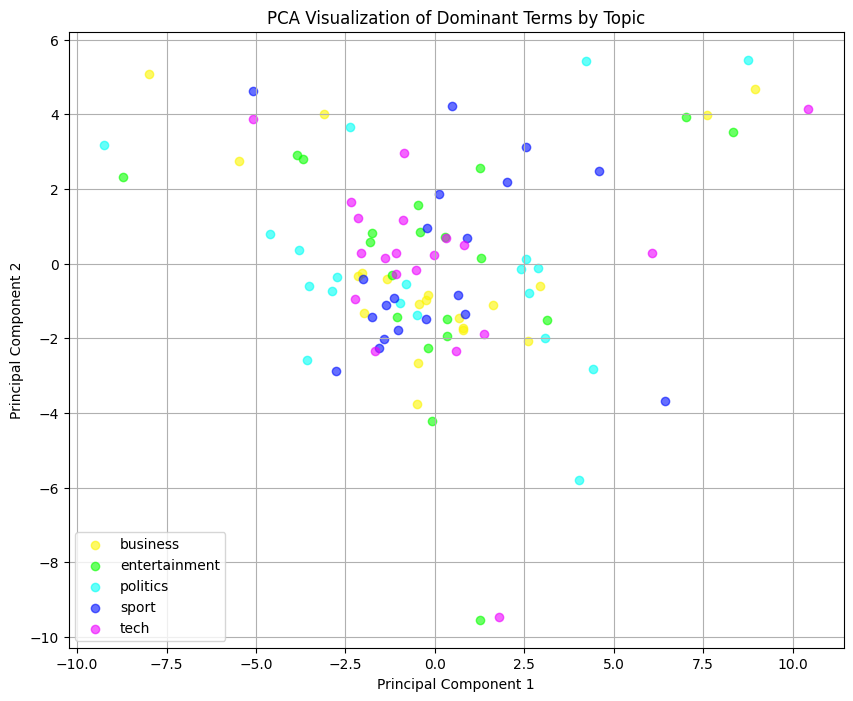

      topic                                               text  topic_id
0  business  quarterly profits at us media giant timewarner...         0
1  business  the dollar has hit its highest level against t...         0
2  business  the owners of embattled russian oil giant yuko...         0
3  business  british airways has blamed high fuel prices fo...         0
4  business  shares in uk drinks and food firm allied domec...         0


In [15]:
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Extraction of the most frequent terms using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=2000)
X = vectorizer.fit_transform(df_cleaned['text'])
terms = vectorizer.get_feature_names_out()

# Get the top 20 terms for each topic
grouped_terms = {}
for topic in df_cleaned['topic'].unique():
    topic_docs = df_cleaned[df_cleaned['topic'] == topic]['text']
    topic_X = vectorizer.transform(topic_docs)
    term_sums = topic_X.sum(axis=0)
    term_freqs = [(terms[i], term_sums[0, i]) for i in range(len(terms))]
    top_terms = sorted(term_freqs, key=lambda x: x[1], reverse=True)[:20]
    grouped_terms[topic] = [term for term, _ in top_terms]

# Step 2: Representation with Word2Vec
model = Word2Vec(df_cleaned['text'].apply(str.split), vector_size=100, window=5, min_count=1, workers=4)

# Get vectors for each selected term
term_vectors = {}
for topic, terms in grouped_terms.items():
    term_vectors[topic] = [model.wv[term] for term in terms if term in model.wv]

# Step 3: Dimensionality Reduction with PCA
pca = PCA(n_components=2)
reduced_vectors = {}
for topic, vectors in term_vectors.items():
    reduced_vectors[topic] = pca.fit_transform(vectors)

# Step 4: Visualization
plt.figure(figsize=(10, 8))
colors = sns.color_palette('hsv', len(reduced_vectors))
for i, (topic, vectors) in enumerate(reduced_vectors.items()):
    vectors = pd.DataFrame(vectors, columns=['PC1', 'PC2'])
    plt.scatter(vectors['PC1'], vectors['PC2'], label=topic, color=colors[i], alpha=0.6)

plt.title('PCA Visualization of Dominant Terms by Topic')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Display cleaned dataset
print(df_cleaned.head())

# Vectorisation des documents

Nous devons créer une fonction qui transforme une liste de $n$ documents en une matrice $X$ de taille $n \times d$, $d$ étant le nombre de dimensions du modèle d'embedding.

Étant donné un modèle d'embedding (par exemple, word2vec), chaque document est vectorisé de la manière suivante :
1. Le document est tokenisé (divisé en mots) et nettoyé.
2. Un vecteur de taille $d$ est calculé pour chaque mot.
3. Les vecteurs des mots sont agregés ensemble pour former un seul vecteur de taille $d$.

In [16]:
from gensim.models import Word2Vec
import numpy as np

def vectorize_documents(documents, model, aggregation='mean'):
    vectorized_docs = []
    for doc in documents:
        tokens = doc.split()
        word_vectors = [model.wv[word] for word in tokens if word in model.wv]
        if word_vectors:
            if aggregation == 'mean':
                document_vector = np.mean(word_vectors, axis=0)
            elif aggregation == 'sum':
                document_vector = np.sum(word_vectors, axis=0)
        else:
            document_vector = np.zeros(model.vector_size)
        vectorized_docs.append(document_vector)
    return np.array(vectorized_docs)

# Exercice 3 : Visualisation de documents par somme des tokens (vs. moyenne).

1. Visualiser des documents textuels avec une ACP en représentant les documents par la somme et par la moyenne.

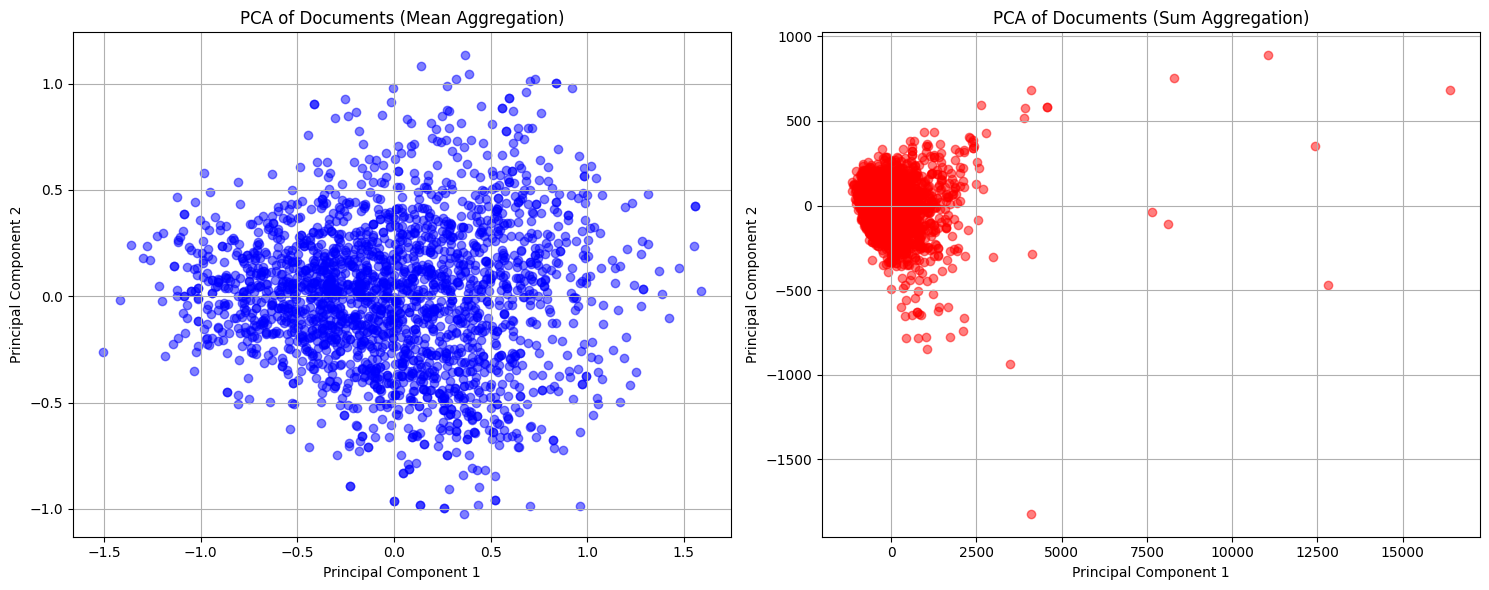

Shape of document vectors (mean): (2225, 100)
Shape of document vectors (sum): (2225, 100)


In [17]:
document_vectors_mean = vectorize_documents(df_cleaned['text'], model, aggregation='mean')
document_vectors_sum = vectorize_documents(df_cleaned['text'], model, aggregation='sum')

# Step 5: PCA Visualization of Documents by Mean and Sum
# PCA for mean vectors
pca_mean = PCA(n_components=2)
doc_pca_mean = pca_mean.fit_transform(document_vectors_mean)

# PCA for sum vectors
pca_sum = PCA(n_components=2)
doc_pca_sum = pca_sum.fit_transform(document_vectors_sum)

# Plotting the PCA results
plt.figure(figsize=(15, 6))

# Mean aggregation plot
plt.subplot(1, 2, 1)
plt.scatter(doc_pca_mean[:, 0], doc_pca_mean[:, 1], alpha=0.5, c='blue')
plt.title('PCA of Documents (Mean Aggregation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Sum aggregation plot
plt.subplot(1, 2, 2)
plt.scatter(doc_pca_sum[:, 0], doc_pca_sum[:, 1], alpha=0.5, c='red')
plt.title('PCA of Documents (Sum Aggregation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

# Display the shape of the document vectors
print("Shape of document vectors (mean):", document_vectors_mean.shape)
print("Shape of document vectors (sum):", document_vectors_sum.shape)

# Exercice 4 : Clustering de documents avec k-means

L'objectif de cet exercice est de catégoriser des documents textuels en utilisant l'algorithme de clustering k-means sur la matrice \( X \) des vecteurs de documents. Ensuite, visualisez les résultats en colorant les points dans un graphique 2D selon les clusters obtenus.


#### Étapes

1. **Application de k-means** :
   1. Utiliser l'algorithme k-means pour grouper les documents en 5 clusters (sur les 2 matrices: somme vs. moyenne).

2. **Visualisation avec clusters** :
   1. Réaliser des visualisations 2D de la matrice \( X \) (réduite via ACP).
   2. Cette fois, colorier les points en fonction des clusters obtenus par k-means.
   3. Analyser la répartition des clusters sur le plot.

3. **Évaluation et interprétation** :
   1. Comparer les versions compressées (somme vs moyenne des embeddings) et déterminez laquelle représente le mieux les données originales.
   2. Utiliser la matrice de confusion pour évaluer la correspondance entre les clusters k-means et les étiquettes réelles.
   3. Réfléchisser aux thèmes ou sujets principaux présents dans chaque cluster.
   

**Ressources pour vous aider :**

- Scikit-learn offre une documentation complète sur K-means, avec des exemples, [Lien vers la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).


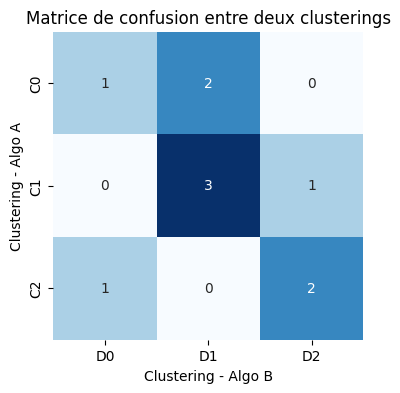

In [18]:
# Pour vous aider, voici comment calculer la matrice de confusion.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

method_A = [0, 0, 1, 1, 2, 2, 2, 0, 1, 1]
method_B = [1, 1, 1, 2, 2, 2, 0, 0, 1, 1]

conf_matrix = confusion_matrix(method_A, method_B)
df_conf_matrix = pd.DataFrame(conf_matrix, index=[f'C{i}' for i in np.unique(method_A)],
                              columns=[f'D{i}' for i in np.unique(method_B)])
plt.figure(figsize=(4, 4))
sns.heatmap(df_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de confusion entre deux clusterings")
plt.xlabel("Clustering - Algo B")
plt.ylabel("Clustering - Algo A")
plt.show()

In [20]:
from sklearn.cluster import KMeans

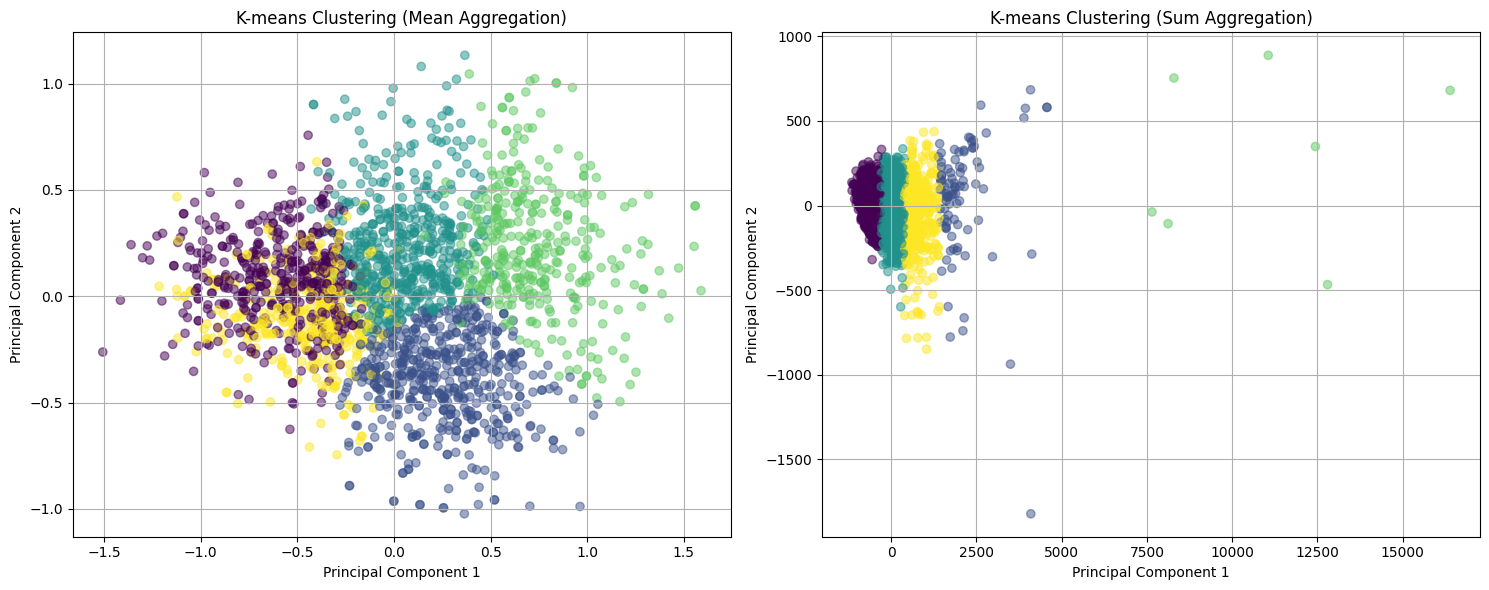

Confusion Matrix (Mean Aggregation):
 [[107  74 137   0 192]
 [181  31  84  23  67]
 [ 14  93 167 138   5]
 [121  23 130 182  55]
 [ 17 303  26  19  36]]
Confusion Matrix (Sum Aggregation):
 [[286  10 174   0  40]
 [262   5  81   3  35]
 [ 87  12 156   3 159]
 [270  13 160   0  68]
 [ 68  52 163   1 117]]
Shape of document vectors (mean): (2225, 100)
Shape of document vectors (sum): (2225, 100)


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Step 6: K-means Clustering on Document Vectors
kmeans_mean = KMeans(n_clusters=5, random_state=42).fit(document_vectors_mean)
kmeans_sum = KMeans(n_clusters=5, random_state=42).fit(document_vectors_sum)

# Step 7: PCA Visualization with Clusters
plt.figure(figsize=(15, 6))

# Clusters for mean aggregation
plt.subplot(1, 2, 1)
plt.scatter(doc_pca_mean[:, 0], doc_pca_mean[:, 1], c=kmeans_mean.labels_, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering (Mean Aggregation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Clusters for sum aggregation
plt.subplot(1, 2, 2)
plt.scatter(doc_pca_sum[:, 0], doc_pca_sum[:, 1], c=kmeans_sum.labels_, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering (Sum Aggregation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 8: Evaluation with Confusion Matrix
true_labels = df_cleaned['topic'].astype('category').cat.codes
conf_matrix_mean = confusion_matrix(true_labels, kmeans_mean.labels_)
conf_matrix_sum = confusion_matrix(true_labels, kmeans_sum.labels_)

print("Confusion Matrix (Mean Aggregation):\n", conf_matrix_mean)
print("Confusion Matrix (Sum Aggregation):\n", conf_matrix_sum)

# Display the shape of the document vectors
print("Shape of document vectors (mean):", document_vectors_mean.shape)
print("Shape of document vectors (sum):", document_vectors_sum.shape)

# Exercice 5 : Réduction de dimensions comme étape de prétraitement

L'objectif de cet exercice est d'utiliser la réduction de dimensions comme une étape de prétraitement pour compresser les données avant de procéder au clustering par k-means. Dans ce cas, le nombre de dimensions peut être supérieur à 2. Comparez ensuite les étiquettes réelles des données avec celles obtenues via k-means, à la fois visuellement et numériquement.

#### Étapes Suggérées
1. **Réduction de dimensions** :
   1. Appliquer une méthode de réduction de dimensions (comme l'ACP ou UMAP) sur vos données. Choisissez un nombre de dimensions supérieur à 2 pour la compression.


2. **Clustering avec k-means** :
   1. Utiliser l'algorithme k-means sur les données compressées pour les regrouper en clusters.


3. **Visualisation 2D** :
   1. Visualiser les clusters.


4. **Comparaison des étiquettes** :
   1. Comparez les clusters obtenus avec les étiquettes réelles des données en utilisant une matrice de confusion.   

C:\Users\ymess\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ymess\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


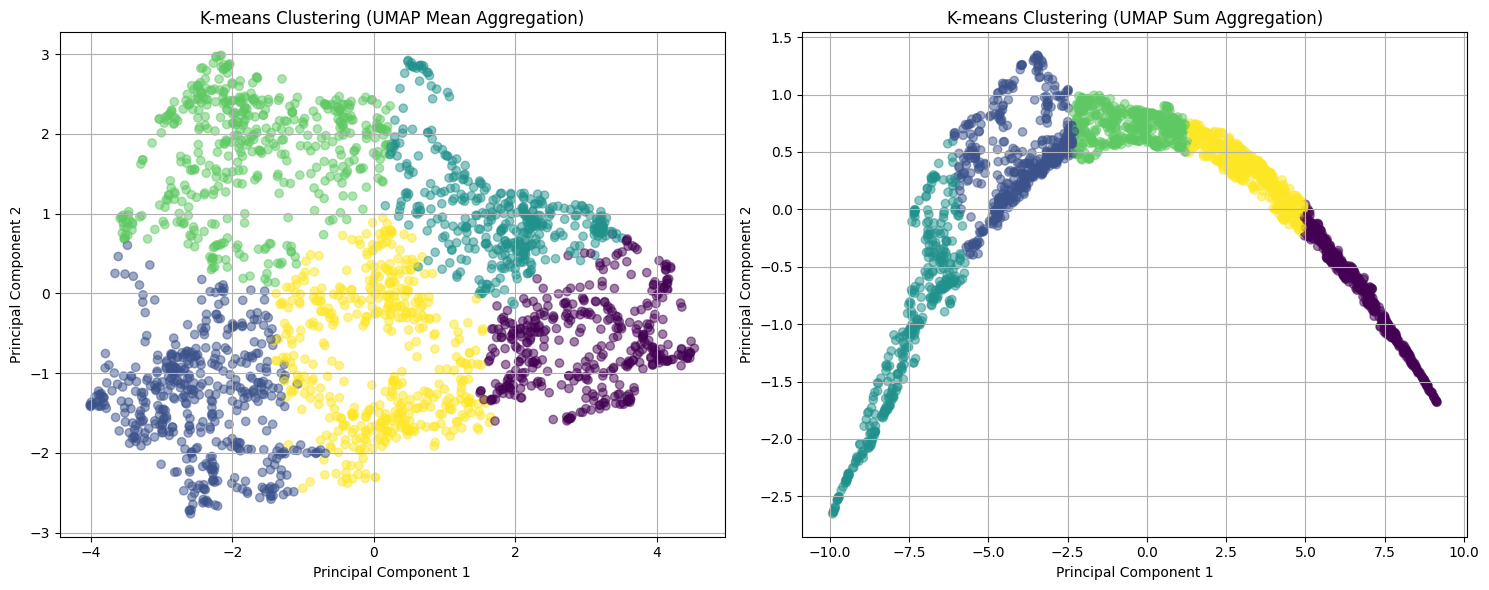

Confusion Matrix (UMAP Mean Aggregation):
 [[ 76   8 247  59 120]
 [178  29  57  29  93]
 [  7 209  15  82 104]
 [136 216  22   9 128]
 [  4  11  58 299  29]]
Confusion Matrix (UMAP Sum Aggregation):
 [[131  77  28 131 143]
 [149  39  26  61 111]
 [ 35 140 112  74  56]
 [150  88  50 105 118]
 [ 12  97 148  87  57]]
Shape of document vectors after UMAP (mean): (2225, 10)
Shape of document vectors after UMAP (sum): (2225, 10)


In [22]:
import umap
# Vectorize the documents using mean and sum aggregation
document_vectors_mean = vectorize_documents(df_cleaned['text'], model, aggregation='mean')
document_vectors_sum = vectorize_documents(df_cleaned['text'], model, aggregation='sum')

# Step 3: Dimensionality Reduction as Preprocessing
# Apply UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=10, random_state=42)
doc_umap_mean = umap_reducer.fit_transform(document_vectors_mean)
doc_umap_sum = umap_reducer.fit_transform(document_vectors_sum)

# Step 4: K-means Clustering on Compressed Document Vectors
kmeans_umap_mean = KMeans(n_clusters=5, random_state=42).fit(doc_umap_mean)
kmeans_umap_sum = KMeans(n_clusters=5, random_state=42).fit(doc_umap_sum)

# Step 5: PCA Visualization with Clusters
pca_vis_mean = PCA(n_components=2)
doc_pca_umap_mean = pca_vis_mean.fit_transform(doc_umap_mean)

pca_vis_sum = PCA(n_components=2)
doc_pca_umap_sum = pca_vis_sum.fit_transform(doc_umap_sum)

plt.figure(figsize=(15, 6))

# Clusters for UMAP mean aggregation
plt.subplot(1, 2, 1)
plt.scatter(doc_pca_umap_mean[:, 0], doc_pca_umap_mean[:, 1], c=kmeans_umap_mean.labels_, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering (UMAP Mean Aggregation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Clusters for UMAP sum aggregation
plt.subplot(1, 2, 2)
plt.scatter(doc_pca_umap_sum[:, 0], doc_pca_umap_sum[:, 1], c=kmeans_umap_sum.labels_, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering (UMAP Sum Aggregation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 6: Evaluation with Confusion Matrix
true_labels = df_cleaned['topic'].astype('category').cat.codes
conf_matrix_umap_mean = confusion_matrix(true_labels, kmeans_umap_mean.labels_)
conf_matrix_umap_sum = confusion_matrix(true_labels, kmeans_umap_sum.labels_)

print("Confusion Matrix (UMAP Mean Aggregation):\n", conf_matrix_umap_mean)
print("Confusion Matrix (UMAP Sum Aggregation):\n", conf_matrix_umap_sum)

# Display the shape of the document vectors
print("Shape of document vectors after UMAP (mean):", doc_umap_mean.shape)
print("Shape of document vectors after UMAP (sum):", doc_umap_sum.shape)

# Exercice 6 : Entraînement d'un modèle Word2Vec

1. **Expérimentez avec les paramètres :** Tester différents paramètres pour entraîner des modèles Word2Vec, à la fois en mode skip-gram et CBOW.
2. **Visualisation des vecteurs :** Utiliser le Projecteur TensorBoard pour visualiser les vecteurs de mots.
3. **Calcul de la représentation des documents** : Appliquer le modèle Word2Vec pour calculer la représentation vectorielle des documents dans votre corpus. Cela implique l'agrégation des vecteurs de mots pour chaque document en prenant la moyenne ou la somme.
4. **Réduction de dimension :** Metter en œuvre une méthode de réduction de dimension sur vos documents.
5. **Clustering avec K-means :** Après la réduction de dimension, utiliser l'algorithme K-means pour regrouper les documents.


**Ressources pour vous aider :**
- Consultez la [documentation Gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#online-training-resuming-training) pour des orientations sur l'entraînement de modèles Word2Vec.


In [23]:
from gensim.models import Word2Vec
import time


# Démarrer un chronomètre pour mesurer le temps d'entraînement.
start = time.time()

# Créer une instance du modèle Word2Vec.
# - vector_size=100: Chaque mot sera représenté par un vecteur de 100 dimensions.
# - window=6: Fenêtre contextuelle de 6 mots de chaque côté du mot cible.
# - min_count=2: Les mots doivent apparaître au moins 2 fois pour être considérés.
# - sg=1: Utiliser l'architecture skip-gram (sg=0 pour CBOW).
# - hs=0: Ne pas utiliser de softmax hiérarchique pour l'entraînement.
# - negative=5: Utiliser l'échantillonnage négatif avec 5 mots "négatifs".
my_w2v_model = Word2Vec(vector_size=100, window=6, min_count=2, sg=1, hs=0, negative=5)

# Construire le vocabulaire à partir du corpus.
# corpus_iterable=wiki_corpus: Le corpus sur lequel entraîner le modèle.
corpus = # Votre corpus
my_w2v_model.build_vocab(corpus_iterable=corpus)

# Entraîner le modèle sur le corpus.
# total_examples=len(wiki_corpus): Le nombre total de phrases dans le corpus.
# epochs=10: Nombre de passages à travers le corpus pour l'entraînement.
my_w2v_model.train(corpus_iterable=corpus, total_examples=len(corpus), epochs=10)

# Calculer et afficher le temps total pris pour l'entraînement.
end = time.time()
print('le temps d\'entraînement a été de : {} secondes'.format(round(end - start, 2)))

SyntaxError: invalid syntax (2576464562.py, line 19)

C:\Users\ymess\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


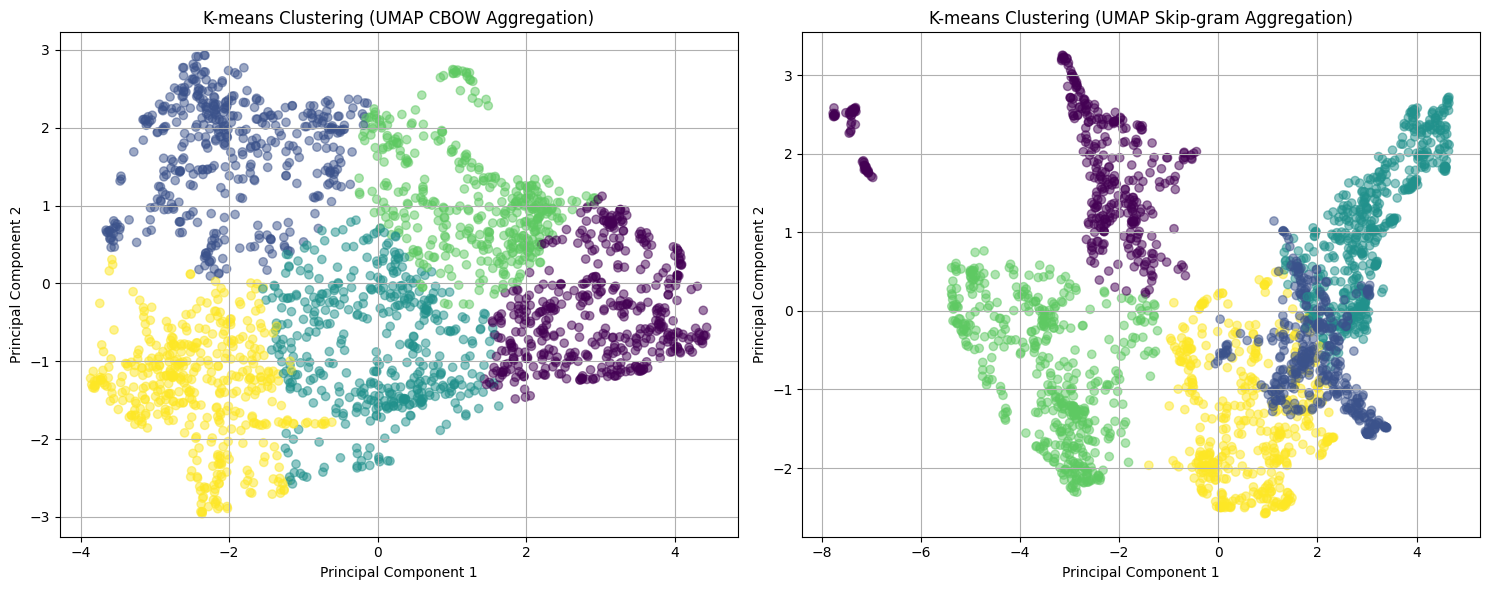

Confusion Matrix (UMAP CBOW Aggregation):
 [[120  38 114 233   5]
 [194  25  77  61  29]
 [  7  85 118  22 185]
 [144   7 115  26 219]
 [ 13 283  27  67  11]]
Confusion Matrix (UMAP Skip-gram Aggregation):
 [[  2   9 461   0  38]
 [290  18  12  46  20]
 [  1  11  37   8 360]
 [ 67   1   0 416  27]
 [ 13 358  17   5   8]]
Shape of document vectors after UMAP (CBOW): (2225, 10)
Shape of document vectors after UMAP (Skip-gram): (2225, 10)


In [24]:
model_cbow = Word2Vec(df_cleaned['text'].apply(str.split), vector_size=100, window=5, min_count=1, workers=4, sg=0)  # CBOW
model_skipgram = Word2Vec(df_cleaned['text'].apply(str.split), vector_size=100, window=5, min_count=1, workers=4, sg=1)  # Skip-gram

# Vectorize the documents using mean aggregation with CBOW and Skip-gram
document_vectors_cbow = vectorize_documents(df_cleaned['text'], model_cbow, aggregation='mean')
document_vectors_skipgram = vectorize_documents(df_cleaned['text'], model_skipgram, aggregation='mean')

# Step 3: Dimensionality Reduction as Preprocessing
# Apply UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=10, random_state=42)
doc_umap_cbow = umap_reducer.fit_transform(document_vectors_cbow)
doc_umap_skipgram = umap_reducer.fit_transform(document_vectors_skipgram)

# Step 4: K-means Clustering on Compressed Document Vectors
kmeans_umap_cbow = KMeans(n_clusters=5, random_state=42).fit(doc_umap_cbow)
kmeans_umap_skipgram = KMeans(n_clusters=5, random_state=42).fit(doc_umap_skipgram)

# Step 5: PCA Visualization with Clusters
pca_vis_cbow = PCA(n_components=2)
doc_pca_umap_cbow = pca_vis_cbow.fit_transform(doc_umap_cbow)

pca_vis_skipgram = PCA(n_components=2)
doc_pca_umap_skipgram = pca_vis_skipgram.fit_transform(doc_umap_skipgram)

plt.figure(figsize=(15, 6))

# Clusters for UMAP CBOW aggregation
plt.subplot(1, 2, 1)
plt.scatter(doc_pca_umap_cbow[:, 0], doc_pca_umap_cbow[:, 1], c=kmeans_umap_cbow.labels_, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering (UMAP CBOW Aggregation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Clusters for UMAP Skip-gram aggregation
plt.subplot(1, 2, 2)
plt.scatter(doc_pca_umap_skipgram[:, 0], doc_pca_umap_skipgram[:, 1], c=kmeans_umap_skipgram.labels_, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering (UMAP Skip-gram Aggregation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 6: Evaluation with Confusion Matrix
true_labels = df_cleaned['topic'].astype('category').cat.codes
conf_matrix_umap_cbow = confusion_matrix(true_labels, kmeans_umap_cbow.labels_)
conf_matrix_umap_skipgram = confusion_matrix(true_labels, kmeans_umap_skipgram.labels_)

print("Confusion Matrix (UMAP CBOW Aggregation):\n", conf_matrix_umap_cbow)
print("Confusion Matrix (UMAP Skip-gram Aggregation):\n", conf_matrix_umap_skipgram)

# Display the shape of the document vectors
print("Shape of document vectors after UMAP (CBOW):", doc_umap_cbow.shape)
print("Shape of document vectors after UMAP (Skip-gram):", doc_umap_skipgram.shape)

# Exercice 7 : Entraînement d'un modèle fastText

En suivant les étapes mentionnées dans l'exercice 6, procéder au clustering en utilisant fastText.

C:\Users\ymess\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


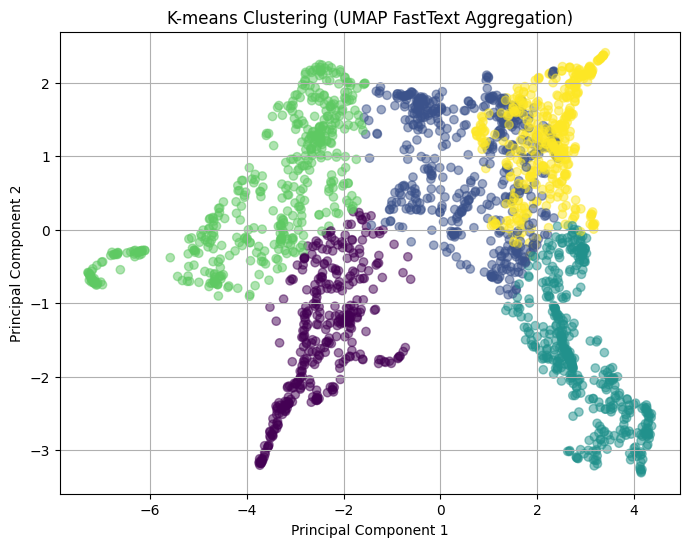

Confusion Matrix (UMAP FastText Aggregation):
 [[  6  86 389   0  29]
 [291  24  19  30  22]
 [  5 358  16   2  36]
 [ 32  37   1 438   3]
 [ 25  26   7   2 341]]
Shape of document vectors after UMAP (FastText): (2225, 10)


In [25]:
# A vous de jouer
from gensim.models import FastText


model_fasttext = FastText(df_cleaned['text'].apply(str.split), vector_size=100, window=5, min_count=1, workers=4, sg=1)  # Skip-gram mode

document_vectors_fasttext = vectorize_documents(df_cleaned['text'], model_fasttext, aggregation='mean')

# Step 3: Dimensionality Reduction as Preprocessing
# Apply UMAP for dimensionality reduction
dumap_reducer_fasttext = umap.UMAP(n_components=10, random_state=42)
doc_umap_fasttext = dumap_reducer_fasttext.fit_transform(document_vectors_fasttext)

# Step 4: K-means Clustering on Compressed Document Vectors
kmeans_umap_fasttext = KMeans(n_clusters=5, random_state=42).fit(doc_umap_fasttext)

# Step 5: PCA Visualization with Clusters
pca_vis_fasttext = PCA(n_components=2)
doc_pca_umap_fasttext = pca_vis_fasttext.fit_transform(doc_umap_fasttext)

plt.figure(figsize=(8, 6))
plt.scatter(doc_pca_umap_fasttext[:, 0], doc_pca_umap_fasttext[:, 1], c=kmeans_umap_fasttext.labels_, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering (UMAP FastText Aggregation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Step 6: Evaluation with Confusion Matrix
true_labels = df_cleaned['topic'].astype('category').cat.codes
conf_matrix_umap_fasttext = confusion_matrix(true_labels, kmeans_umap_fasttext.labels_)

print("Confusion Matrix (UMAP FastText Aggregation):\n", conf_matrix_umap_fasttext)

# Display the shape of the document vectors
print("Shape of document vectors after UMAP (FastText):", doc_umap_fasttext.shape)


# Exercice 8 : Factoshiny
1. Sur les matrices TF-IDF et CountVectorizer, lancer une ACP et une AFC sur R (avec Factoshiny).

In [27]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned['text'])

# Convert TF-IDF matrix to a DataFrame and export to CSV
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.to_csv('tfidf_matrix.csv', index=False)

# Convert CountVectorizer matrix to a DataFrame and export to CSV
count_matrix_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())  # Fix: Use vectorizer.get_feature_names_out()
count_matrix_df.to_csv('count_matrix.csv', index=False)

print("TF-IDF and Count matrices exported successfully.")


TF-IDF and Count matrices exported successfully.
